In [1]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
from kuramoto1 import Kuramoto
from scipy import stats 
import IS as isfn
import network as netfn
import scipy

sns.reset_orig()
plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

In [23]:
# Create 
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
reglist = sorted(glob.glob('*rigid*'))
coordlist = sorted(glob.glob('*realcoord*'))

# Build nodes
* unconnected nodes from real fish structure
* k-means on all fish warped to same space: k = mean number of cells
* n cells - distance between cells in space

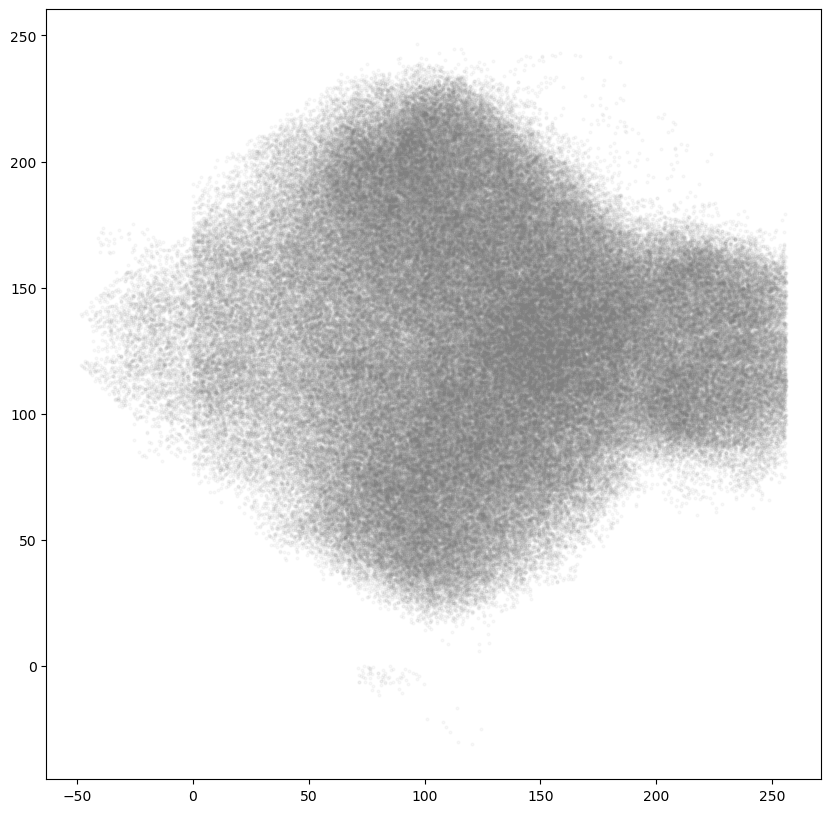

8990


In [86]:
#Plot all registered cells
fig,axarr = plt.subplots(figsize = (10,10))
comb_coords = np.load(reglist[0])
for i in range(len(reglist)-1):
    comb_coords = np.row_stack((comb_coords,np.load(reglist[i+1])))

spatial_conversion = [.5, .5, 15]
space_coord = np.multiply(comb_coords, spatial_conversion)
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'grey' , alpha = 0.05)
plt.show()
#How many cell clusters - mean of all cells used in av calculation
sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [87]:
#Remove unwanted coords for plotting
x,y = 140, 240 
coordvec = []
for i in range(5):
    x  = x+10
    y = y-10
    xcoord = np.where(space_coord[:,0] > x)[0]
    ycoord = np.where((space_coord[:,1] > y))[0]
    coordvec = np.append(coordvec, np.intersect1d(xcoord,ycoord))
    
remaining = np.where(space_coord[:,1]< 5)
coordvec = np.append(coordvec, remaining)
coordvec = np.unique(coordvec.astype(int))

new_space_coord = np.zeros((space_coord.shape[0] - coordvec.shape[0], 3))
count=0
for i in range(space_coord.shape[0]):
    if i in coordvec:
        continue
    else:
        new_space_coord[count] = space_coord[i]
        count+=1


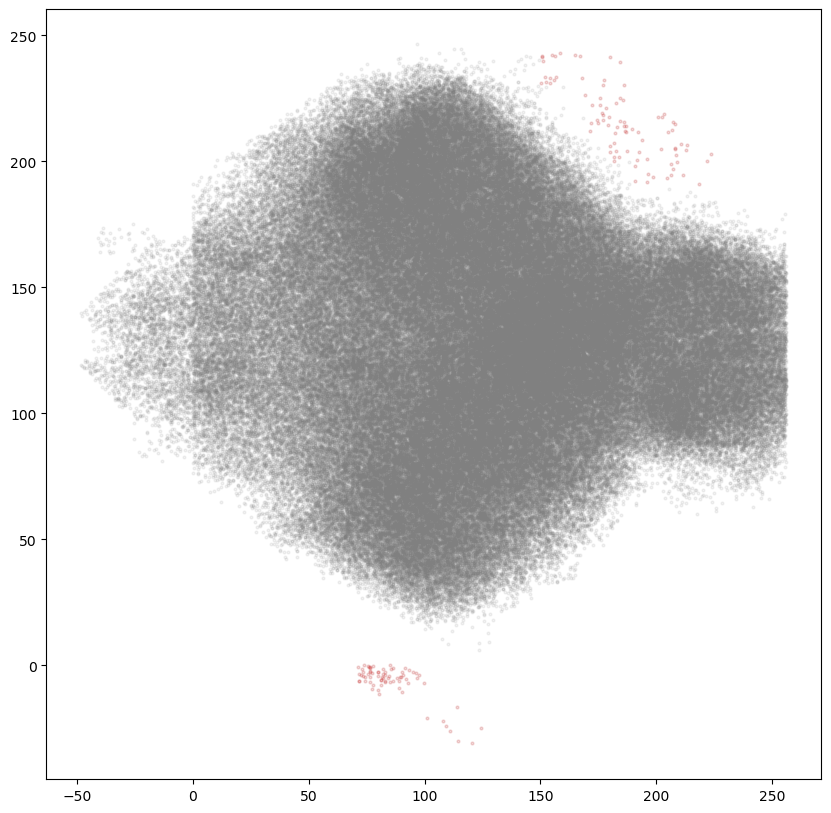

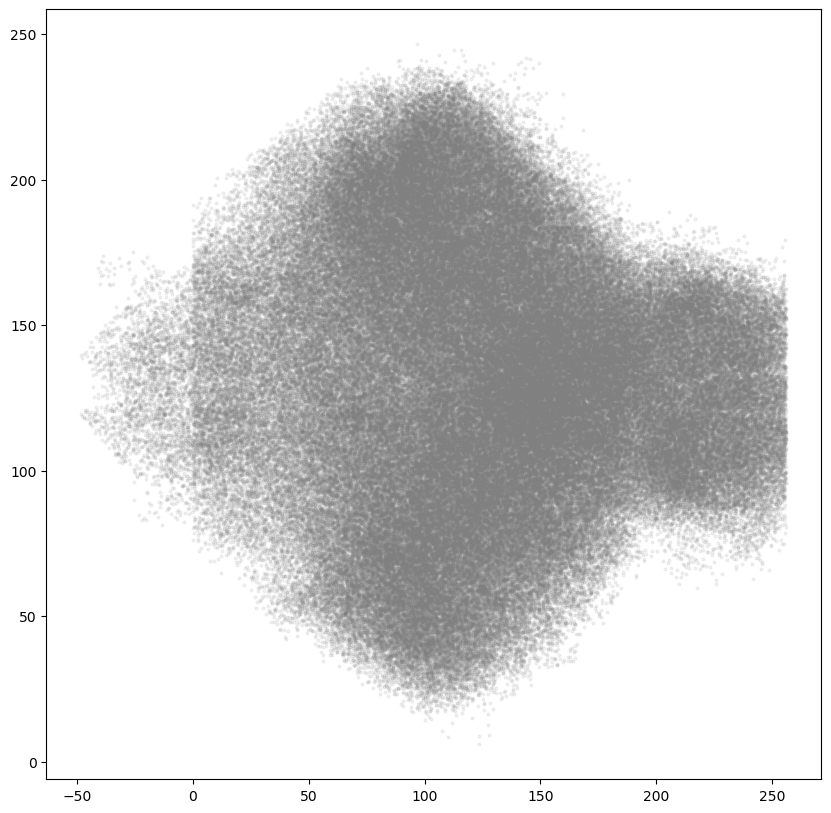

8990


In [88]:
#PLot outlier removal
fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
axarr.scatter(space_coord[:,0][coordvec], space_coord[:,1][coordvec], s = 4, color = 'red' , alpha = 0.1)
plt.show()

fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(new_space_coord[:,0], new_space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
plt.show()

sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [ ]:
#Kmeans clustering
from sklearn.cluster import KMeans
kmeans   = KMeans(n_clusters=n_clust, random_state=0).fit(new_space_coord)  #perform k means on all cells
klab =  kmeans.labels_
space_coord_labels = np.column_stack((new_space_coord, klab))
np.save(savepath + 'klabels-spaced-coords.npy', space_coord_labels)

In [94]:
#Average cells by labels to make new cluster
coords = np.load(net[0])
unq = np.unique(coords[:,3]).astype(int)
node_coord = np.zeros((unq.shape[0], 3))
for i in unq:
    data = coords[np.where(coords[:,3] == unq[i])][:,:3]
    node_coord[i] = [sum(x)/len(x) for x in zip(*data)]
np.save(savepath + 'knodes-coords.npy', node_coord)

In [ ]:
fig,axarr = plt.subplots(figsize = (10,10))
coords = np.load(net[0])
axarr.scatter(coords[:,0], coords[:,1], s = 4, color = 'grey' , alpha = 0.05)
axarr.scatter(node_coord[:,0], node_coord[:,1], s = 4, color = 'red' , alpha = 0.3)
plt.show()

## Parameters
* k = edge density, number of nearest neighbours to connect to
* p = probability of reassigning network - p defines small worldness
* s = edge weight (probability of firing), scaled for distance


## Statistics
* edge density - determined by k
* cycle density, length - k and p
* small worldness (clustering coefficient and path length) - k and p
* branching ratio - s and p

# Toy models

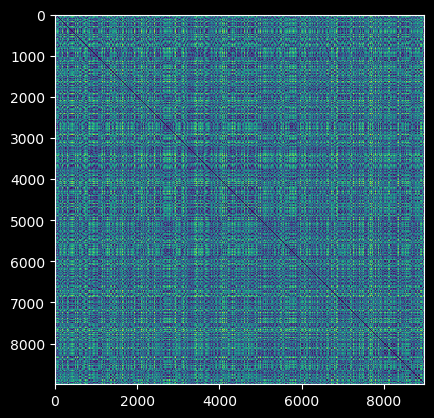

In [303]:
#Toy models
Nnodes    = 8990
cell_locs = np.random.rand(Nnodes, 2)
dist = euclidean_distances(cell_locs)
plt.imshow(dist)
plt.show()

In [120]:
oldA = sim.old_A
oldA

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [129]:
#Calculate old matrix cycles
G = nx.from_numpy_matrix(oldA)
cyc = nx.algorithms.cycle_basis(G)
edge =  G.number_of_edges() 
cyc_vec = np.zeros(len(cyc))
for t in range(len(cyc)):
    cyc_vec[t] = len(cyc[t])
old_cyc = [np.unique(cyc_vec, return_counts=True),len(cyc),edge]

In [130]:
old_cyc

[(array([3., 4., 5., 6., 7., 8.]), array([222,  10,   3,  13,  10,   5])),
 263,
 312]

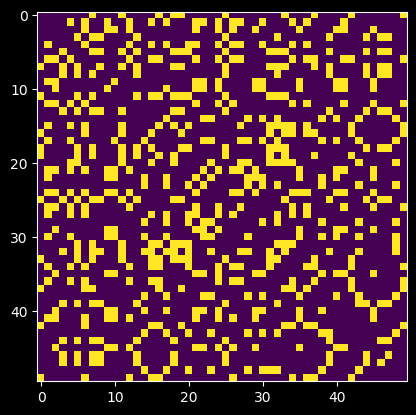

In [132]:
plt.imshow(oldA)
plt.show()

In [306]:
#Toy models
sim_list = list(range(len(p_list)))
cyc_list = list(range(len(p_list)))

for i in range(len(p_list)):
    sim = netfn.netsim(dist).ws_generate(0.01, 0.05)
    sim_list[i] = sim.A
    
    G = nx.from_numpy_matrix(sim.A)
    cyc = nx.algorithms.cycle_basis(G)
    edge =  G.number_of_edges() 
    cyc_vec = np.zeros(len(cyc))
    for t in range(len(cyc)):
        cyc_vec[t] = len(cyc[t])
    cyc_un = np.unique(cyc_vec, return_counts=True)
    multi = np.multiply(cyc_un[0],cyc_un[1])
    cyc_list[i] = [np.sum(multi) , np.sum(multi)/len(cyc), len(cyc),edge]

In [ ]:
paramlist = [k_vals[0]]
output = adfn.parallel(2, p_vals[:2], netfn.watt, paramlist, netfn.netsim)

cores = 2
listlist = p_vals[:2]
func = netsim(dist).ws_generate
paramlist = [k_vals[0]]

In [ ]:
#=====================================================================
def parallel_class(cores, listlist, func, paramlist): 
#=====================================================================
    """This function allows parallel pooling of processes from a class function
    cores = number of cores ()
    paramlist = list with parameter inputs that you will parallel process (inputs must be at start of function)
    func = function name
    paramlist = list containing function parameters 

    """
    from multiprocessing import Pool
    import numpy as np
    pool = Pool(cores)
    count = 0

    output_list = list(range((np.int(len(listlist)/cores))))
    for i in range(len(output_list)):
        paramlist_levels = list(range(cores))
        for e in range(len(paramlist_levels)):
            newlist = listlist[count:count+1]
            newlist.extend(paramlist)
            paramlist_levels[e] = newlist
            count+=1
        output_list[i] = pool.starmap(func, paramlist_levels)


    #Append all calculated value together
    if isinstance(output_list[0][0], int):
        return(np.hstack(np.array(output_list)))
    else:
        return_list = list(range(len(output_list[0][0])))
        new_array = np.vstack(np.array(output_list))
        return([new_array[:,i] for i in range(new_array.shape[1])])

    return(return_list)

In [ ]:

from multiprocessing import Pool
import numpy as np
pool = Pool(cores)
count = 0

output_list = list(range((np.int(len(listlist)/cores))))
for i in range(len(output_list)):
    paramlist_levels = list(range(cores))
    for e in range(len(paramlist_levels)):
        newlist = listlist[count:count+1]
        newlist.extend(paramlist)
        paramlist_levels[e] = newlist
        count+=1
    output_list[i] = pool.starmap(func, paramlist_levels)

# Build networks
1. Randomly draw 10 k values between range
2. For each k draw 10 p values between range (sample each p 10 times)
3. Construct networks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
node = sorted(glob.glob('knodes*'))
netlist1 = sorted(glob.glob('*network-k-0.001*-cycles*'))
netlist2 = sorted(glob.glob('*network-k-0.05*-cycles*'))
netlist3 = sorted(glob.glob('*network2*k-0.001*-cycles*'))
netlist4 = sorted(glob.glob('*network2*k-0.05*-cycles*'))

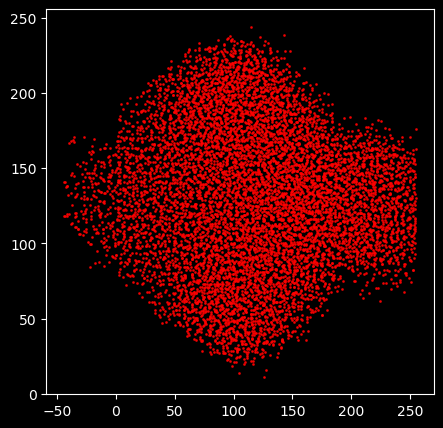

In [3]:
fig,axarr = plt.subplots(figsize = (5,5))
nodes = np.load(node[0])
axarr.scatter(nodes[:,0], nodes[:,1], s = 1, color = 'red' , alpha = 0.8)
plt.show()

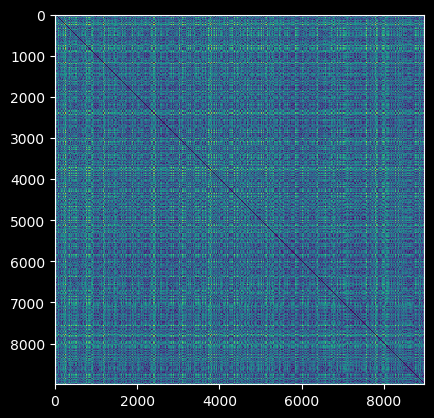

In [156]:
#K + P - LOG SCALE 
import numpy as np
import matplotlib.pyplot as plt
p_vals = adfn.repeat_list(0.1,10)
k_vals = []
for i in range(10):
    k_vals = np.append(k_vals, (i+1)/nodes.shape[0])

cell_locs = nodes
dist = euclidean_distances(nodes)
plt.imshow(dist)
plt.show()

In [157]:
p_vals

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [158]:
k_vals

array([0.00011123, 0.00022247, 0.0003337 , 0.00044494, 0.00055617,
       0.00066741, 0.00077864, 0.00088988, 0.00100111, 0.00111235])

In [ ]:
savepath = Fdrop + 'Project/' + experiment + os.sep 

# Sweep through k and p
#----------------------------------------
from scipy import sparse
import scipy
import networkx as nx
for i in range(len(k_vals)):
    for e in range(len(p_vals)):
        output = netfn.netsim(dist).ws_generate(k_vals[i], p_vals[e])
        sparse_A = sparse.csr_matrix(output.A)
        scipy.sparse.save_npz(savepath + 'network-k' + str(k_vals[i]) + '-p' + str(p_vals[e]) + '-' + str(e+1), sparse_A)
        mat = output.A
        G = nx.from_numpy_matrix(mat)
        cyc = nx.algorithms.cycle_basis(G)
        edge =  G.number_of_edges() 
        cyc_vec = np.zeros(len(cyc))
        for t in range(len(cyc)):
            cyc_vec[t] = len(cyc[t])
        cyc_list = [np.unique(cyc_vec, return_counts=True),len(cyc),edge]
        np.save(savepath + 'network-k-' +  str(k_vals[i]) + '-p' + str(p_vals[e]) + '-' + str(e+1) + '-cycles.npy', cyc_list)

# Calculate cycles
1. Calculate cycles for each network (every k + p combination)

In [615]:
import numpy as np

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
netlist3 = sorted(glob.glob('network2*k-0.001*cycles*'))
netist4 = sorted(glob.glob('network2*k-0.05*cycles*'))

In [191]:
k_vals

array([0.00011123, 0.00022247, 0.0003337 , 0.00044494, 0.00055617,
       0.00066741, 0.00077864, 0.00088988, 0.00100111, 0.00111235])

In [ ]:
#Check which k values create variance in cycles
#P=0.9
for e in range(len(k_vals)):
    cycles = sorted(glob.glob('lowk*' + str(k_vals[e]) + '*p0.8**cycles*'))
    for i in range(len(cycles)):
        print(np.load(cycles[i], allow_pickle=True)[1])

In [71]:
# CHECK THAT SAME P/K CREATES CYCLE VARIATION
for i in range(len(netlist1)):
    vals = np.load(netlist1[i], allow_pickle=True)
    cycles = vals[1]
    edges = vals[2]
    cyc_dens = cycles/edges
    multi = np.multiply(vals[0][0],vals[0][1])
    cyc_nodes =  np.sum(multi)
    mean_cyc_nodes = (cyc_nodes/cycles)
    print(cycles, edges, cyc_dens, cyc_nodes, mean_cyc_nodes)

30754 39743 0.7738218050977531 8299194.0 269.85738440528064
30742 39731 0.7737534922352822 8163882.0 265.5611866501854
30762 39751 0.7738673240924756 8217520.0 267.1321760613744
30748 39737 0.7737876538238921 8359045.0 271.85654351502535
30759 39748 0.7738502566166852 7982400.0 259.51428850092657


In [72]:
# CHECK THAT SAME P/K CREATES CYCLE VARIATION
for i in range(len(netlist2)):
    vals = np.load(netlist2[i], allow_pickle=True)
    cycles = vals[1]
    edges = vals[2]
    cyc_dens = cycles/edges
    multi = np.multiply(vals[0][0],vals[0][1])
    cyc_nodes =  np.sum(multi)
    mean_cyc_nodes = (cyc_nodes/cycles)
    print(cycles, edges, cyc_dens, cyc_nodes, mean_cyc_nodes)

2326833 2335822 0.9961516759410606 19699149.0 8.466077711636375
2326782 2335771 0.9961515919154746 19355474.0 8.318559280585804
2326785 2335774 0.9961515968582577 17932086.0 7.706808321353283
2326745 2335734 0.996151530953439 18769592.0 8.066888292442876
2326724 2335713 0.9961514963525057 19189200.0 8.247303934630837


In [616]:
netlist3, netlist4

(['network2-k-0.001-p0.1-1-cycles.npy',
  'network2-k-0.001-p0.1-2-cycles.npy',
  'network2-k-0.001-p0.1-3-cycles.npy',
  'network2-k-0.001-p0.1-4-cycles.npy',
  'network2-k-0.001-p0.1-5-cycles.npy'],
 ['network2-k-0.05-p0.1-1-cycles.npy',
  'network2-k-0.05-p0.1-2-cycles.npy',
  'network2-k-0.05-p0.1-3-cycles.npy',
  'network2-k-0.05-p0.1-4-cycles.npy',
  'network2-k-0.05-p0.1-5-cycles.npy'])

In [617]:
# CHECK THAT SAME P/K CREATES CYCLE VARIATION
for i in range(len(netlist3)):
    vals = np.load(netlist3[i], allow_pickle=True)
    cycles = vals[1]
    edges = vals[2]
    cyc_dens = cycles/edges
    multi = np.multiply(vals[0][0],vals[0][1])
    cyc_nodes =  np.sum(multi)
    mean_cyc_nodes = (cyc_nodes/cycles)
    print(cycles, edges, cyc_dens, cyc_nodes, mean_cyc_nodes)

30694 39683 0.7734798276339995 8312108.0 270.8056297647749
30694 39683 0.7734798276339995 8109767.0 264.2134293347234
30694 39683 0.7734798276339995 7983533.0 260.10076887991136
30694 39683 0.7734798276339995 8004249.0 260.7756890597511
30694 39683 0.7734798276339995 8277562.0 269.6801329250016


In [618]:
# CHECK THAT SAME P/K CREATES CYCLE VARIATION
for i in range(len(netlist4)):
    vals = np.load(netlist4[i], allow_pickle=True)
    cycles = vals[1]
    edges = vals[2]
    cyc_dens = cycles/edges
    multi = np.multiply(vals[0][0],vals[0][1])
    cyc_nodes =  np.sum(multi)
    mean_cyc_nodes = (cyc_nodes/cycles)
    print(cycles, edges, cyc_dens, cyc_nodes, mean_cyc_nodes)

2324079 2333068 0.996147133302587 19185465.0 8.255082981258383
2324079 2333068 0.996147133302587 19444742.0 8.366644163128706
2324079 2333068 0.996147133302587 18076102.0 7.777748518875649
2324079 2333068 0.996147133302587 19770766.0 8.506925108828057
2324079 2333068 0.996147133302587 18670777.0 8.033624072159338


# Assign weights
1. For each k/p/cycle  - assign 5 BR weights

In [9]:
# Find empirical avalanches - find appropriate range
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)

blnlist = sorted(glob.glob('*BLN*_av.npy*'))
p5list = sorted(glob.glob('*PTZ05*_av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))
blnlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_av.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_av.npy']

In [11]:
np.max(np.load(blnlist[0])[0])

4114

In [21]:
bln, p5, p20 = [],[],[]
for i in range(len(blnlist)):
    bln = np.append(bln, np.max(np.load(blnlist[i])[1]))
    p5 = np.append(p5, np.max(np.load(p5list[i])[1]))
    p20 = np.append(p20, np.max(np.load(p20list[i])[1]))

In [17]:
bln, p5, p20

(array([4.11400e+03, 6.73843e+05, 4.25000e+03, 7.67000e+02, 5.71000e+02,
        1.80000e+02, 2.44000e+02, 3.00000e+01, 5.58000e+02, 6.70000e+01,
        4.90000e+02]),
 array([ 20363., 554278.,  22880.,  18580.,  30324.,   4224.,  16304.,
           954.,  33791.,   2046.,  33814.]),
 array([ 185070.,  116941.,  626713.,  387299.,   39723.,  797909.,
         256387., 1645074., 3018790.,  193130., 4701223.]))

In [22]:
bln, p5, p20

(array([ 198., 2455.,  107.,   46.,   12.,   27.,   41.,   11.,   36.,
          16.,   57.]),
 array([  85., 1385.,   54.,   86.,  140.,   26.,   72.,   17.,   88.,
          22.,  401.]),
 array([ 375.,  614.,  758.,  331.,  168.,  916.,  385., 1824., 3386.,
         192., 4913.]))

In [24]:
bln, p5, p20 = [],[],[]
for i in range(len(blnlist)):
    bln = np.append(bln, np.mean(np.load(blnlist[i])[1]))
    p5 = np.append(p5, np.mean(np.load(p5list[i])[1]))
    p20 = np.append(p20, np.mean(np.load(p20list[i])[1]))

In [19]:
bln, p5, p20

(array([ 6.75023484, 14.99781937,  6.31697276,  6.50581062,  4.32760357,
         4.69615909,  5.11067948,  3.96288544,  5.93034997,  4.50718377,
         5.72953176]),
 array([ 8.92405801, 19.77662669,  7.41188929,  7.02708171,  8.80552662,
         5.75644173,  6.59164571,  4.46509313,  7.59038241,  5.84433325,
         9.6024788 ]),
 array([13.50013645, 17.11340673, 19.92000076, 12.40115853,  9.9186465 ,
        28.64877097, 17.42306891, 40.52902099, 47.84065276, 10.79205568,
        86.52149464]))

In [25]:
bln, p5, p20

(array([2.23307697, 2.22315302, 1.96229941, 1.8444225 , 1.70258327,
        1.74774138, 1.99453516, 1.64189679, 1.7450044 , 1.79448775,
        2.11650798]),
 array([2.20624205, 2.35763145, 2.10787333, 1.79240986, 2.1048745 ,
        1.69721454, 1.97299053, 1.52367411, 1.83145644, 1.92172929,
        2.08117707]),
 array([2.40835077, 2.43015342, 2.03849002, 2.07989879, 1.82202   ,
        1.70810661, 1.84242454, 1.54901418, 2.15756504, 1.94938614,
        2.58096789]))

In [590]:
# Assign weights
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
adjlist = sorted(glob.glob('*network2*adj*.npz'))
netlist = sorted(glob.glob('*lowk*network*' + str(k_vals[2]) + '*p0.5*-1.npz*'))
netlist

['lowk-network-k0.0003337041156840934-p0.5-1.npz']

In [726]:
netlist3 = sorted(glob.glob('network2*-k0.001*npz*'))
netlist4 = sorted(glob.glob('network2*-k0.05*npz*'))
netlist3, netlist4

(['network2-k0.001-p0.1-1.npz',
  'network2-k0.001-p0.1-2.npz',
  'network2-k0.001-p0.1-3.npz',
  'network2-k0.001-p0.1-4.npz',
  'network2-k0.001-p0.1-5.npz'],
 ['network2-k0.05-p0.1-1.npz',
  'network2-k0.05-p0.1-2.npz',
  'network2-k0.05-p0.1-3.npz',
  'network2-k0.05-p0.1-4.npz',
  'network2-k0.05-p0.1-5.npz'])

In [55]:
# Find maximum distance between nodes
cell_locs = nodes
dist = euclidean_distances(cell_locs)
np.max(dist), np.min(dist)

(332.2354928749352, 0.0)

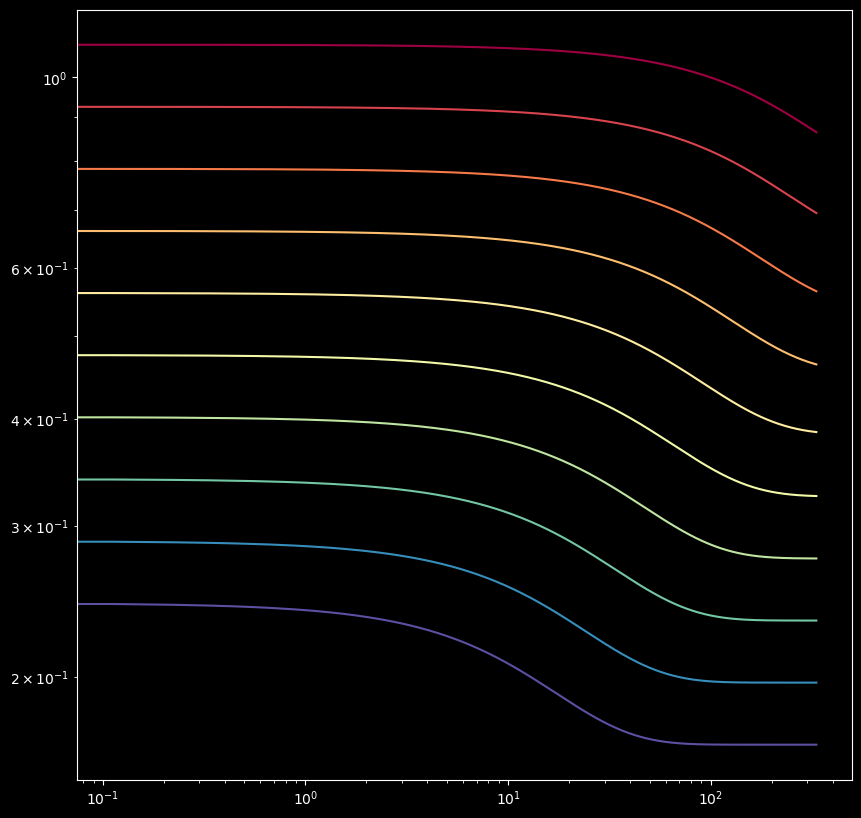

In [202]:
# Simple sigmoid function to 'soften' the exponential
#-------------------------------------------------------------------------------
def sig(x, s=1):
  return 1 / (1+np.exp(-x))

# Conversion from distance to edge weights, scaled (itself exponentially) by s
#-------------------------------------------------------------------------------
def dist2edge(distance, s):
  edgeweights = np.exp(s/2)*sig(np.exp(-0.07/np.exp(s)*distance))/3
  return edgeweights

# Calculate and plot in a loop with s increasing from 0 to 2
#===============================================================================
Nsteps  = 10
svals   = np.linspace(0, 3, Nsteps)
fig, ax = plt.subplots(1, figsize=(10,10))
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))

distance = np.linspace(0, np.max(dist), 3000)
for s in range(len(svals)):
  ax.plot(distance, dist2edge(distance, svals[s]), c=colors[s])
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()


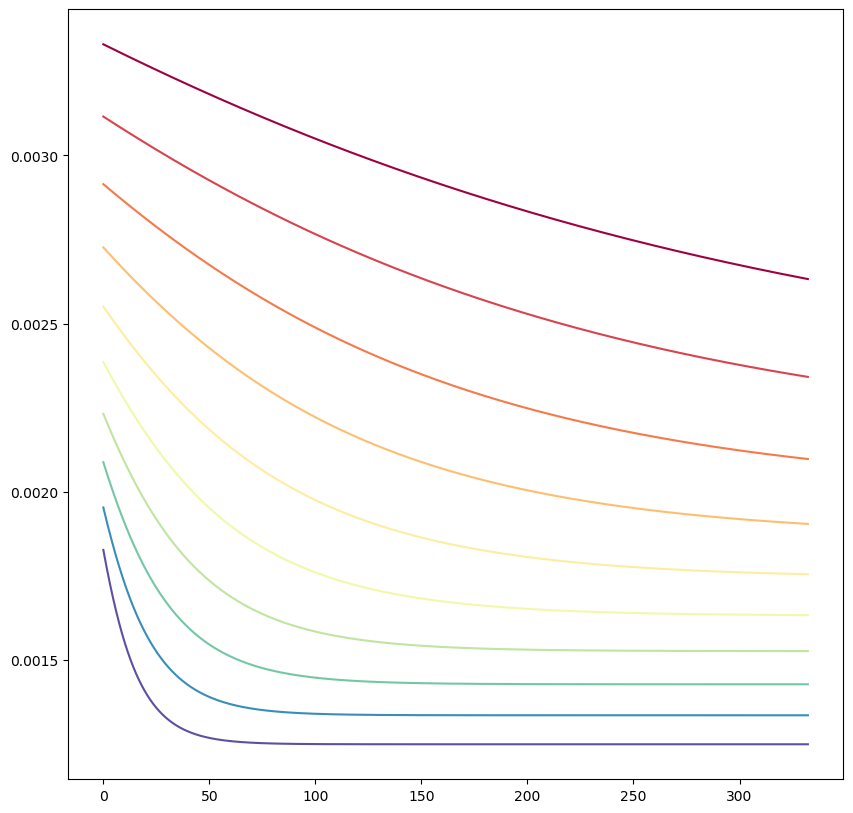

In [762]:
# Simple sigmoid function to 'soften' the exponential
#-------------------------------------------------------------------------------
def sig(x):
  return 1 / (1+np.exp(-x))

# Conversion from distance to edge weights, scaled (itself exponentially) by s
#low k - divisor = 5
#high k - divisor = 10
#really high divisor = 400
#-------------------------------------------------------------------------------
divisor = 400
def dist2edge(distance, s):
  edgeweights = np.exp(s/5)*sig(np.exp(-0.07/np.exp(s)*distance))/divisor
  return edgeweights

# Calculate and plot in a loop with s increasing from 0 to 2
#===============================================================================
Nsteps  = 10
svals   = np.linspace(0, 3, Nsteps)
#svals   = np.linspace(0, 3, Nsteps)
fig, ax = plt.subplots(1, figsize=(10,10))
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))

distance = np.linspace(0, np.max(dist), 3000)
for s in range(len(svals)):
  ax.plot(distance, dist2edge(distance, svals[s]), c=colors[s])
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.show()


In [ ]:
#S RANGE
from scipy import sparse
Nsteps  = 10
svals   = np.linspace(0, 2.3, Nsteps)

for i in range(len(netlist)):
    mat = scipy.sparse.load_npz(netlist[i])
    mat = mat.todense()
    adj_mat = np.zeros((dist.shape))
    [rows, cols]    = np.where(np.triu(mat) == 1) 
    
    for s in range(len(svals)):
        for e in range(len(rows)):
            edge_weight = dist2edge(dist[rows[e], cols[e]],svals[s])
            adj_mat[rows[e], cols[e]] = edge_weight 
            adj_mat[cols[e], rows[e]] = edge_weight
        sparse_adj_mat = sparse.csr_matrix(adj_mat) 
        scipy.sparse.save_npz(savepath + 'lowk-adjmat' + netlist[0][netlist[0].find('-k'):netlist[0].find('.npz')-2:] + '-s' + str(svals[s]), sparse_adj_mat)
        print('Done ' + str(netlist[i]))

In [736]:
netlist3, netlist4

(['network2-k0.001-p0.1-1.npz',
  'network2-k0.001-p0.1-2.npz',
  'network2-k0.001-p0.1-3.npz',
  'network2-k0.001-p0.1-4.npz',
  'network2-k0.001-p0.1-5.npz'],
 ['network2-k0.05-p0.1-1.npz',
  'network2-k0.05-p0.1-2.npz',
  'network2-k0.05-p0.1-3.npz',
  'network2-k0.05-p0.1-4.npz',
  'network2-k0.05-p0.1-5.npz'])

In [763]:
#SINGLE S
from scipy import sparse
s = 0.2
netlist = netlist4
for i in range(len(netlist)):
    mat = scipy.sparse.load_npz(netlist[i])
    mat = mat.todense()
    adj_mat = np.zeros((dist.shape))
    [rows, cols]    = np.where(np.triu(mat) == 1) 

    for e in range(len(rows)):
        edge_weight = dist2edge(dist[rows[e], cols[e]],s)
        adj_mat[rows[e], cols[e]] = edge_weight 
        adj_mat[cols[e], rows[e]] = edge_weight
    sparse_adj_mat = sparse.csr_matrix(adj_mat) 
    scipy.sparse.save_npz(savepath + 'highk-adjmat' + netlist[i][netlist[i].find('-k'):], sparse_adj_mat)
    print('Done ' + str(netlist[i]))

Done network2-k0.05-p0.1-1.npz
Done network2-k0.05-p0.1-2.npz
Done network2-k0.05-p0.1-3.npz
Done network2-k0.05-p0.1-4.npz
Done network2-k0.05-p0.1-5.npz


# Simulate avalanches

1. For each BR bin - simulate 10 avalanches
2. Calculate 

In [764]:
# Find networks
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
choose = 4
adjlist = sorted(glob.glob('*highk*k0.05*'))
cycle_list = sorted(glob.glob('network2*k-0.05*cycles*'))
adjlist

['highk-adjmat-k0.05-p0.1-1.npz',
 'highk-adjmat-k0.05-p0.1-2.npz',
 'highk-adjmat-k0.05-p0.1-3.npz',
 'highk-adjmat-k0.05-p0.1-4.npz',
 'highk-adjmat-k0.05-p0.1-5.npz']

In [749]:
cyclist

array([19185465., 19444742., 18076102., 19770766., 18670777.])

In [ ]:
#ORDER ACCORDING TO CYCLE NUMBER
#P=0.9
cycles = sorted(glob.glob('network2*k-0.001*cycles*'))
cyclist=[]
for i in range(len(cycles)):
    cyclist = np.append(cyclist, np.load(cycles[i], allow_pickle=True)[1])
sort_netlist = [x for _,x in sorted(zip(cyclist, adjlist))]
adjlist = sort_netlist
adjlist

In [765]:
# ORDER ACCORDING TO CYCLE LENGTH
cyclist = []
for i in range(len(cycle_list)):
    vals = np.load(cycle_list[i], allow_pickle=True)
    cycles = vals[1]
    edges = vals[2]
    cyc_dens = cycles/edges
    multi = np.multiply(vals[0][0],vals[0][1])
    cyc_nodes =  np.sum(multi)
    mean_cyc_nodes = (cyc_nodes/cycles)
    cyclist =  np.append(cyclist, cyc_nodes)
sort_netlist = [x for _,x in sorted(zip(cyclist, adjlist))]
adjlist = sort_netlist
adjlist

['highk-adjmat-k0.05-p0.1-3.npz',
 'highk-adjmat-k0.05-p0.1-5.npz',
 'highk-adjmat-k0.05-p0.1-1.npz',
 'highk-adjmat-k0.05-p0.1-2.npz',
 'highk-adjmat-k0.05-p0.1-4.npz']

In [761]:
i

4

In [ ]:
#Ping random node
n_sims = 1000

av_size_list, av_dur_list = list(range(len(adjlist))), list(range(len(adjlist)))
for o in range(len(adjlist)):
    mat = scipy.sparse.load_npz(adjlist[o])
    mat = mat.todense()
    mat = np.asarray(mat)

    av_size = []
    av_dur = []

    for i in range(n_sims):

        #Decide start node
        start_node = np.random.uniform(0, mat.shape[0]-1)
        down = int(start_node)
        up= int(start_node)+1
        if np.random.uniform(down, up) >= start_node:
            start_node = up
        else:
            start_node = down

        #Find cells to propagate
        def propagate_neighbours(mat, start_node):
            prop_nodes = []
            nodes = np.where(mat[start_node] > 0) [0]
            weights = mat[start_node][nodes]
            for f in range(len(nodes)):
                if weights[f] > np.random.uniform(0, 1):
                    prop_nodes = np.append(prop_nodes, nodes[f])
            return(prop_nodes)


        #Initialise avalanche - ping first node
        t_nodes = propagate_neighbours(mat, start_node) #Find connected neighbours > threshold
        curr_list = t_nodes
        iterate = 'yes'

        if len(t_nodes) > 1: #must have at least 3 cells to begin avalanche
            all_nodes = np.append(start_node, t_nodes)
            timesteps = 1

            while iterate == 'yes':
                tplus_nodes = []
                for z in range(len(curr_list)):
                    #List of all nodes active in next timestep
                    tplus_nodes = np.append(tplus_nodes, propagate_neighbours(mat, int(curr_list[z])))

                all_nodes = np.append(all_nodes, tplus_nodes)
                timesteps+=1
                curr_list = tplus_nodes

                if len(tplus_nodes) == 0: #if no more active cells - stop
                    iterate = 'no'
            av_size = np.append(av_size, len(all_nodes)) 
            av_dur = np.append(av_dur, timesteps)

        else:
            continue
            
    av_size_list[o] = av_size
    av_dur_list[o] = av_dur
    print('Done network ' + str(o+1))

Done network 1
Done network 2
Done network 3
Done network 4


### Cycles

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

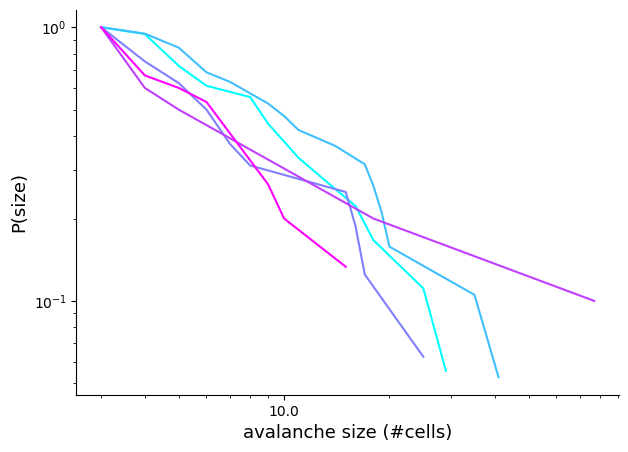

In [767]:
#Cycle length - high k
import matplotlib
import powerlaw
colors = cm.cool(np.linspace(0, 1, len(av_size_list)))

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

av = []
for i in range(len(av_size_list)):
    av = np.append(av, av_size_list[i])
    
mini = np.min(av)
maxi = np.max(av)

for i in range(len(av_size_list)):
    binned=np.linspace(mini,maxi, 100)
    hist = np.histogram(av_size_list[i], bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    #axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', color = colors[i], linewidth = 1.5, markersize = 1, alpha = 1)
    powerlaw.plot_ccdf(av_size_list[i], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

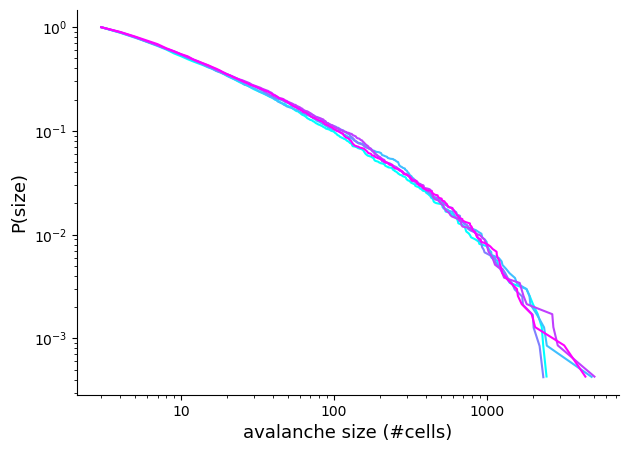

In [724]:
#Cycle length - high k
import matplotlib
import powerlaw
colors = cm.cool(np.linspace(0, 1, len(av_size_list)))

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

av = []
for i in range(len(av_size_list)):
    av = np.append(av, av_size_list[i])
    
mini = np.min(av)
maxi = np.max(av)

for i in range(len(av_size_list)):
    binned=np.linspace(mini,maxi, 100)
    hist = np.histogram(av_size_list[i], bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    #axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', color = colors[i], linewidth = 1.5, markersize = 1, alpha = 1)
    powerlaw.plot_ccdf(av_size_list[i], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

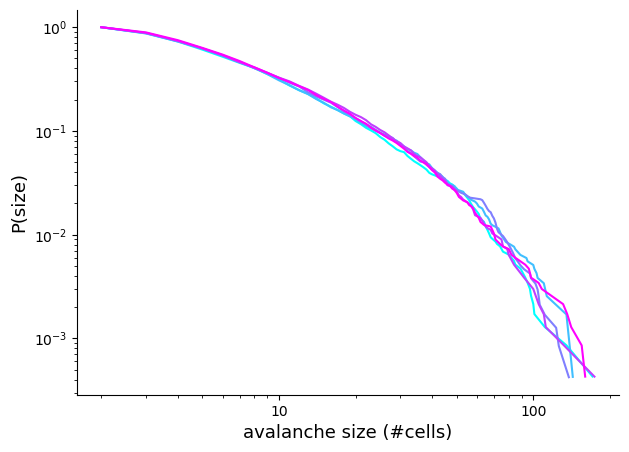

In [725]:
#Cycle length number
import matplotlib
colors = cm.cool(np.linspace(0, 1, len(av_dur_list)))

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

av = []
for i in range(len(av_dur_list)):
    av = np.append(av, av_dur_list[i])
    
mini = np.min(av)
maxi = np.max(av)

for i in range(len(av_dur_list)):
    binned=np.linspace(mini,maxi, 10)
    hist = np.histogram(av_dur_list[i], bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    #axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', color = colors[i], linewidth = 1.5, markersize = 1, alpha = 1)
    powerlaw.plot_ccdf(av_dur_list[i], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

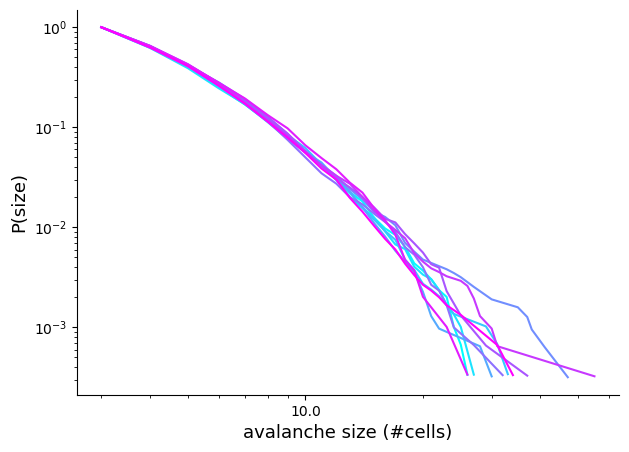

In [550]:
#Cycle number - 0 edges
import matplotlib
import powerlaw
colors = cm.cool(np.linspace(0, 1, len(av_size_list)))

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

av = []
for i in range(len(av_size_list)):
    av = np.append(av, av_size_list[i])
    
mini = np.min(av)
maxi = np.max(av)

for i in range(len(av_size_list)):
    binned=np.linspace(mini,maxi, 10)
    hist = np.histogram(av_size_list[i], bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    #axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', color = colors[i], linewidth = 1.5, markersize = 1, alpha = 1)
    powerlaw.plot_ccdf(av_size_list[i], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

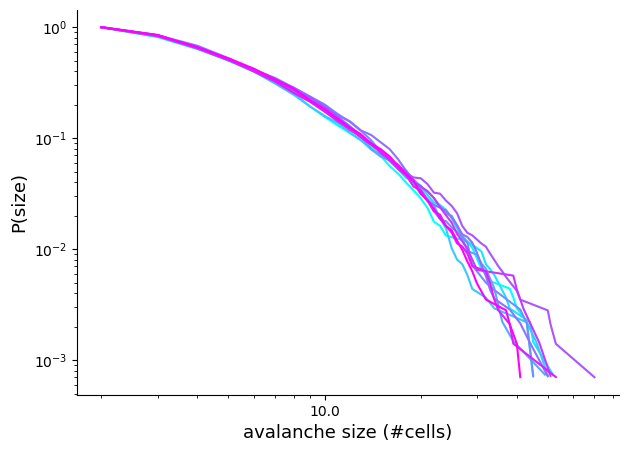

In [486]:
#Cycle number
import matplotlib
colors = cm.cool(np.linspace(0, 1, len(av_dur_list)))

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

av = []
for i in range(len(av_dur_list)):
    av = np.append(av, av_dur_list[i])
    
mini = np.min(av)
maxi = np.max(av)

for i in range(len(av_dur_list)):
    binned=np.linspace(mini,maxi, 10)
    hist = np.histogram(av_dur_list[i], bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    #axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', color = colors[i], linewidth = 1.5, markersize = 1, alpha = 1)
    powerlaw.plot_ccdf(av_dur_list[i], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

### K

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

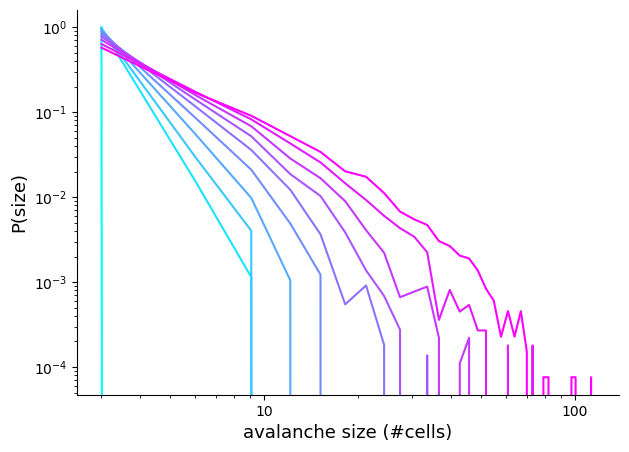

In [314]:
import matplotlib
colors = cm.cool(np.linspace(0, 1, len(av_size_list)))

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

av = []
for i in range(len(av_size_list)):
    av = np.append(av, av_size_list[i])
    
mini = np.min(av)
maxi = np.max(av)

for i in range(len(av_size_list)):
    binned=np.linspace(mini,maxi, 40)
    hist = np.histogram(av_size_list[i], bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', color = colors[i], linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

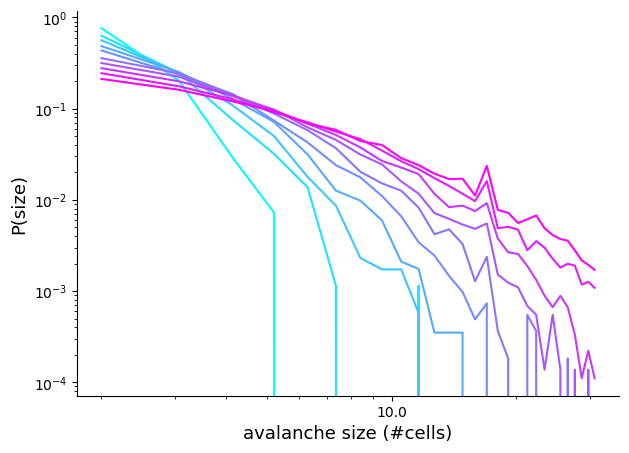

In [321]:
import matplotlib
colors = cm.cool(np.linspace(0, 1, len(av_dur_list)))

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

av = []
for i in range(len(av_dur_list)):
    av = np.append(av, av_dur_list[i])
    
mini = np.min(av)
maxi = np.max(av)

for i in range(len(av_dur_list)):
    binned=np.linspace(mini,maxi, 30)
    hist = np.histogram(av_size_list[i], bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', color = colors[i], linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

### P

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

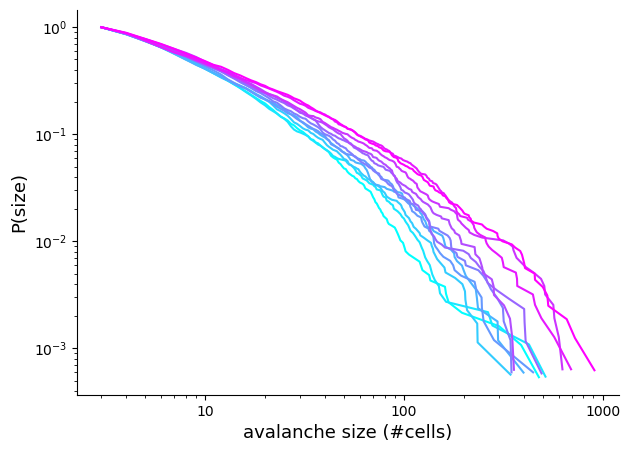

In [586]:
import matplotlib
colors = cm.cool(np.linspace(0, 1, len(av_size_list)))

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

av = []
for i in range(len(av_size_list)):
    av = np.append(av, av_size_list[i])
    
mini = np.min(av)
maxi = np.max(av)

for i in range(len(av_size_list)):
    binned=np.linspace(mini,maxi, 40)
    hist = np.histogram(av_size_list[i], bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    #axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', color = colors[i], linewidth = 1.5, markersize = 1, alpha = 1)
    powerlaw.plot_ccdf(av_size_list[i], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

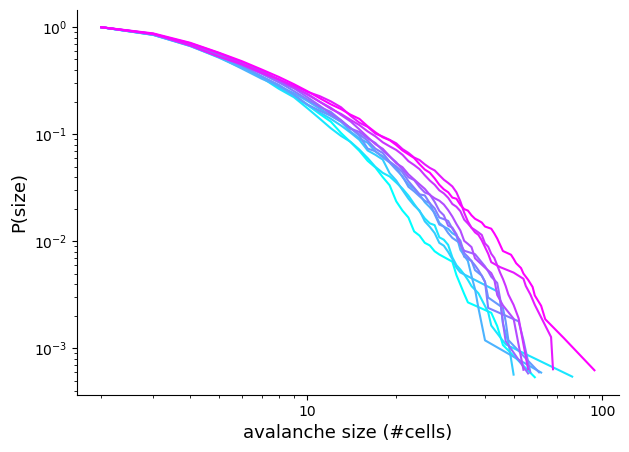

In [587]:
import matplotlib
colors = cm.cool(np.linspace(0, 1, len(av_dur_list)))

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

av = []
for i in range(len(av_dur_list)):
    av = np.append(av, av_dur_list[i])
    
mini = np.min(av)
maxi = np.max(av)

for i in range(len(av_dur_list)):
    binned=np.linspace(mini,maxi, 40)
    hist = np.histogram(av_dur_list[i], bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    #axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', color = colors[i], linewidth = 1.5, markersize = 1, alpha = 1)
    powerlaw.plot_ccdf(av_dur_list[i], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

### S

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

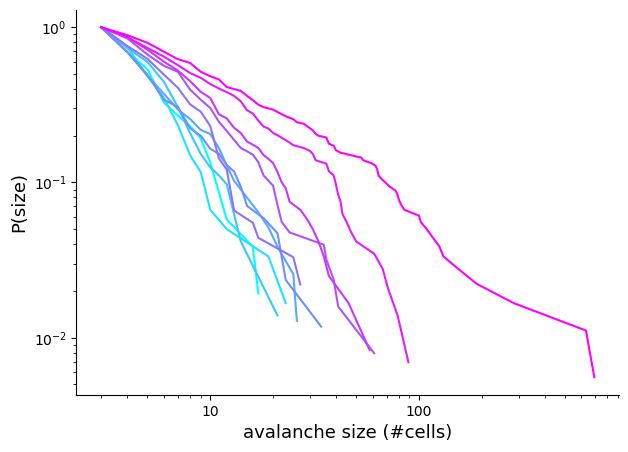

In [611]:
import matplotlib
colors = cm.cool(np.linspace(0, 1, len(av_size_list)))

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

av = []
for i in range(len(av_size_list)):
    av = np.append(av, av_size_list[i])
    
mini = np.min(av)
maxi = np.max(av)

for i in range(len(av_size_list)):
    binned=np.linspace(mini,maxi, 40)
    hist = np.histogram(av_size_list[i], bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    #axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', color = colors[i], linewidth = 1.5, markersize = 1, alpha = 1)
    powerlaw.plot_ccdf(av_size_list[i], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

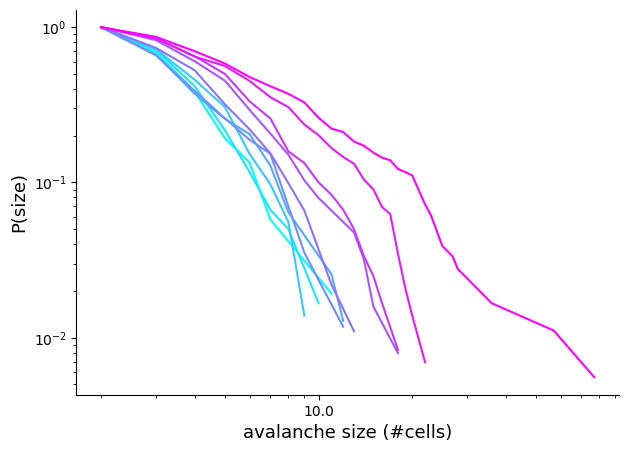

In [612]:
import matplotlib
colors = cm.cool(np.linspace(0, 1, len(av_dur_list)))

fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()

av = []
for i in range(len(av_dur_list)):
    av = np.append(av, av_dur_list[i])
    
mini = np.min(av)
maxi = np.max(av)

for i in range(len(av_dur_list)):
    binned=np.linspace(mini,maxi, 40)
    hist = np.histogram(av_dur_list[i], bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    #axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', color = colors[i], linewidth = 1.5, markersize = 1, alpha = 1)
    powerlaw.plot_ccdf(av_dur_list[i], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

# Individual parameter effect 

1. Bin all networks by single parameter
2. Change in exponent, shape, distribution type as you change that parameter

# Fit data
1. For each edge decile-cycle decile combination - concatenate all avalanche simulations into 1 distribution
2. Plot as pdf
3. Empirical distribution - concatenate together, or use fish that minimises ks distance to mean distribution
4. Which parameters minimise ks distance to empirical baseline + ptz data
5. Compare parameters

# Parameter sweep
* Find optimal p and k range that maximises cycle variance
* does p create a variance in cycle parameters for each k


In [7]:
#K + P - LOG SCALE 
import numpy as np
import matplotlib.pyplot as plt
p_vals = np.geomspace(0.001, 1, 50)
p_vals = [round(p_vals[i],4) for i in range(p_vals.shape[0])]
k_vals = np.geomspace((1/nodes.shape[0]), 0.5, 50)
k_vals = [round(k_vals[i], 6) for i in range(k_vals.shape[0])]

cell_locs = nodes
dist = euclidean_distances(nodes)


newp_vals = []
for i in range(len(cyclist)):
    newp_vals = np.append(newp_vals,cyclist[i][cyclist[i].find('-p')+1:cyclist[i].find('-cy')])

In [ ]:
savepath = F10t + 'Project/' + experiment + os.sep 

# Sweep through k and p
#----------------------------------------
from scipy import sparse
import scipy
import networkx as nx
for i in range(len(k_vals)):
    for e in range(len(p_vals)):
        output = netfn.netsim(dist).ws_generate(k_vals[i], p_vals[e])       
        sparse_A = sparse.csr_matrix(output.A)   
    
        scipy.sparse.save_npz(savepath + 'psweep2-netparam-k' + str(k_vals[i]) + '-p' + str(p_vals[e]), sparse_A)
    adfn.timeprint(10, i, len(k_vals), str(k_vals[i]))

In [ ]:
# Calculate cycles
#----------------------------------------
from scipy import sparse
import scipy
import networkx as nx
for i in range(len(p_vals)):
    p_list = sorted(glob.glob('psweep2*p*' + str(p_vals[i]) + '*'))
    cyc_list = adfn.list_of_list(len(p_list),3)
    for e in range(len(p_list)):
        mat = scipy.sparse.load_npz(p_list[e])
        mat = mat.todense()
        G = nx.from_numpy_matrix(mat)
        cyc = nx.algorithms.cycle_basis(G)
        edge =  G.number_of_edges() 
        cyc_vec = np.zeros(len(cyc))
        for t in range(len(cyc)):
            cyc_vec[t] = len(cyc[t])
        cyc_list[e] = [np.unique(cyc_vec, return_counts=True),len(cyc),edge]
    np.save(savepath + 'netparam2-' + p_list[0][p_list[0].find('-p')+1:p_list[0].find('.npz')] + '-cycles.npy', cyc_list)
    print('Done fish ' + str(p_vals[i]))

In [9]:
#Calculate cycle parameters 
cyc_n_list = list(range(len(cyclist)))
cyc_nodes_list = list(range(len(cyclist)))
mean_cyc_nodes_list = list(range(len(cyclist)))

for i in range(len(cyclist)):
    cyc_n = np.zeros(len(np.load(cyclist[i], allow_pickle=True)))
    cyc_nodes = np.zeros(len(np.load(cyclist[i], allow_pickle=True)))
    mean_cyc_nodes = np.zeros(len(np.load(cyclist[i], allow_pickle=True)))
    for e in range(len(np.load(cyclist[i], allow_pickle=True))):
        cyc_n[e] = np.load(cyclist[i], allow_pickle=True)[e][2]
        multi = np.multiply(np.load(cyclist[i], allow_pickle=True)[e][0][0],np.load(cyclist[i], allow_pickle=True)[e][0][1])
        cyc_nodes[e] =  np.sum(multi)
        mean_cyc_nodes[e] = (cyc_nodes[e]/cyc_n[e])
    cyc_n_list[i] = cyc_n
    cyc_nodes_list[i] = cyc_nodes
    mean_cyc_nodes_list[i] = mean_cyc_nodes
    

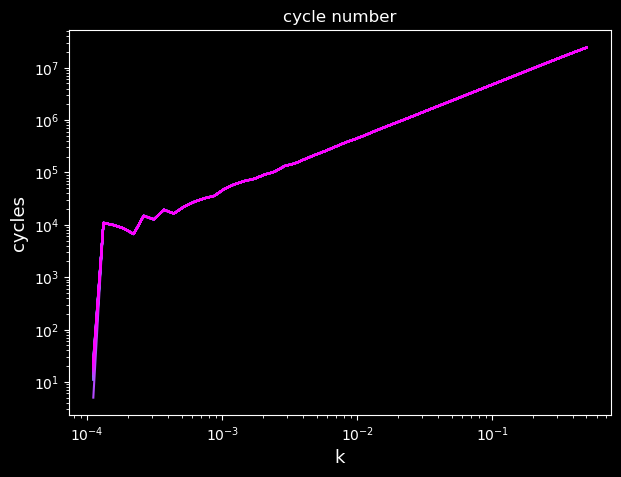

In [11]:
#As k increases how do cycles increase for all p values
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

colors = cm.cool(np.linspace(0, 1, len(cyclist)))
fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(cyc_n_list)):
    plot1 = plt.plot(k_vals, cyc_n_list[i], c = colors[i],label = cyclist[i][cyclist[i].find('-p')+1:cyclist[i].find('-c')])
    axarr.set_title(str('cycle number'))
    axarr.set_ylabel('cycles', size = '13')
    axarr.set_xlabel('k', size = '13')
    axarr.set_xscale('log')
    axarr.set_yscale('log')

#axarr.legend()
plt.show()

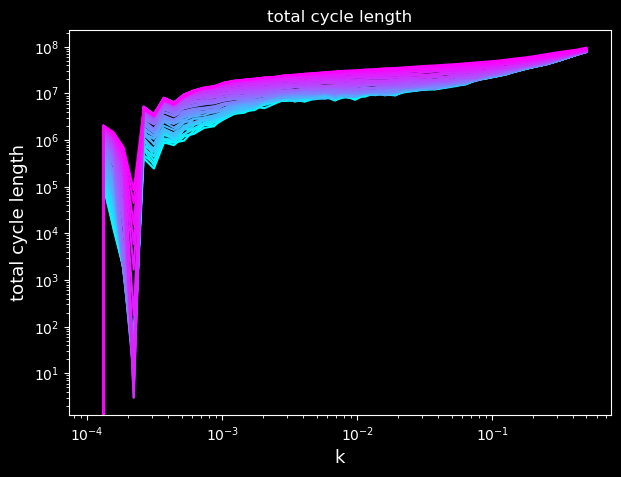

In [13]:
# as k increases how does cycle length increase for each p
colors = cm.cool(np.linspace(0, 1, len(cyclist)))
fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(cyc_nodes_list)):
    plt.plot(k_vals, cyc_nodes_list[i], c = colors[i], label = cyclist[i][cyclist[i].find('-p')+1:cyclist[i].find('-c')])
    axarr.set_title(str('total cycle length'))
    axarr.set_ylabel('total cycle length', size = '13')
    axarr.set_xlabel('k', size = '13')
axarr.set_xscale('log')
axarr.set_yscale('log')
#plt.xlim(right = 0.1)  

#axarr.legend()
plt.show()

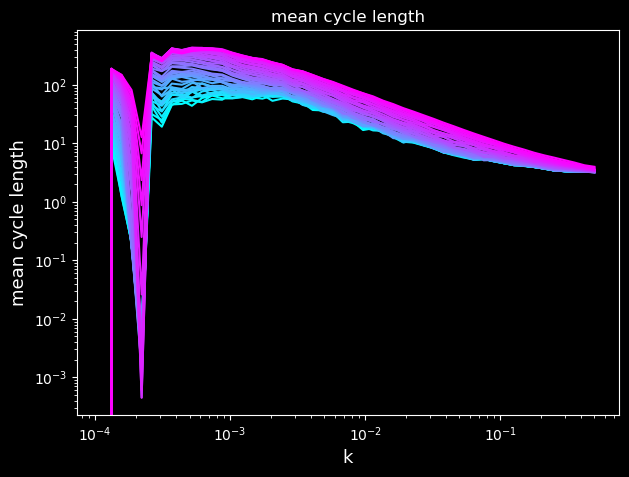

In [14]:
# as k increases how does mean cycle length change for each p

fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(mean_cyc_nodes_list)):
    plt.plot(k_vals, mean_cyc_nodes_list[i], c = colors[i], label = cyclist[i][cyclist[i].find('-p')+1:cyclist[i].find('-c')])
    axarr.set_title(str('mean cycle length'))
    axarr.set_ylabel('mean cycle length', size = '13')
    axarr.set_xlabel('k', size = '13')
axarr.set_xscale('log')
axarr.set_yscale('log')
#axarr.legend()
plt.show()

In [12]:
#Calculate cycle parameters 
cyc_n_list = list(range(len(np.load(cyclist[0],allow_pickle=True))))
cyc_nodes_list = list(range(len(np.load(cyclist[0],allow_pickle=True))))
mean_cyc_nodes_list = list(range(len(np.load(cyclist[0],allow_pickle=True))))

for i in range(len(np.load(cyclist[0],allow_pickle=True))):     
    cyc_n = np.zeros(len(cyclist))
    cyc_nodes = np.zeros(len(cyclist))
    mean_cyc_nodes = np.zeros(len(cyclist))
    for e in range(len(cyclist)):
        cyc_n[e] = np.load(cyclist[e], allow_pickle=True)[i][2]
        multi = np.multiply(np.load(cyclist[e], allow_pickle=True)[i][0][0],np.load(cyclist[e], allow_pickle=True)[i][0][1])
        cyc_nodes[e] =  np.sum(multi)
        mean_cyc_nodes[e] = (cyc_nodes[e]/cyc_n[e])
    cyc_n_list[i] = cyc_n
    cyc_nodes_list[i] = cyc_nodes
    mean_cyc_nodes_list[i] = mean_cyc_nodes

In [14]:
newp_vals = []
for i in range(len(cyclist)):
    newp_vals = np.append(newp_vals,cyclist[i][cyclist[i].find('-p')+2:cyclist[i].find('-cy')])

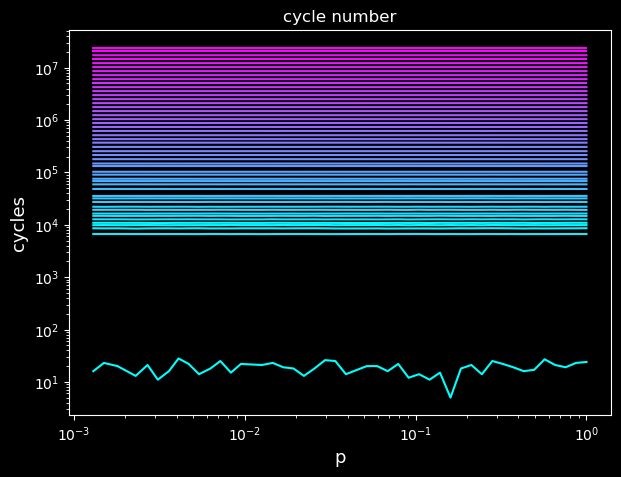

In [16]:
# as p increases how does cycles increase for each k
colors = cm.cool(np.linspace(0, 1, len(cyc_n_list)))
fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(cyc_n_list)):
    plt.plot(newp_vals.astype(float), cyc_n_list[i], c = colors[i], label = k_vals[i])
    axarr.set_title(str('cycle number'))
    axarr.set_ylabel('cycles', size = '13')
    axarr.set_xlabel('p', size = '13')
axarr.set_xscale('log')
axarr.set_yscale('log')
#axarr.legend()
plt.show()

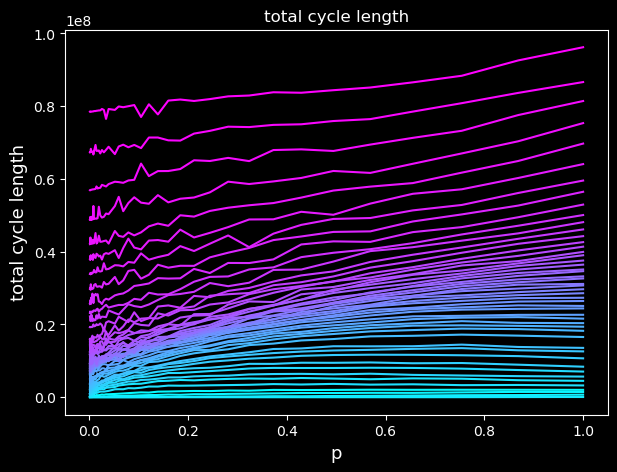

In [18]:
#as p increases how does total cycle length increase for each k

fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(cyc_nodes_list)):
    plt.plot(newp_vals.astype(float), cyc_nodes_list[i], c = colors[i], label = k_vals[i])
    axarr.set_title(str('total cycle length'))
    axarr.set_ylabel('total cycle length', size = '13')
    axarr.set_xlabel('p', size = '13')
#axarr.set_xscale('log')
#axarr.set_yscale('log')
#axarr.legend()
plt.show()

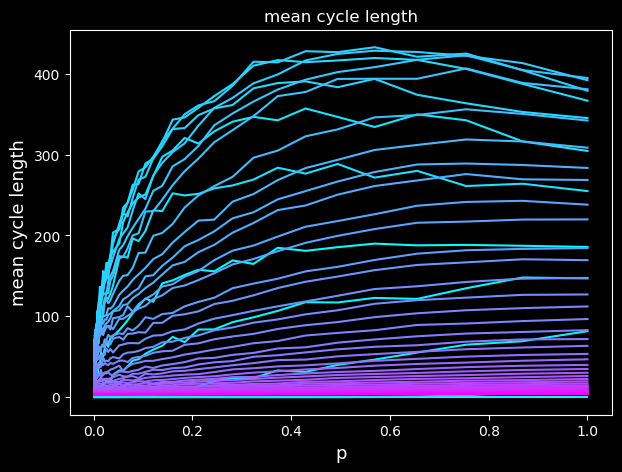

In [19]:
# as p increases how does mean cycle length increase
fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(mean_cyc_nodes_list)):
    plt.plot(newp_vals.astype(float), mean_cyc_nodes_list[i], c = colors[i], label = k_vals[i])
    axarr.set_title(str('mean cycle length'))
    axarr.set_ylabel('mean cycle length', size = '13')
    axarr.set_xlabel('p', size = '13')
#axarr.set_xscale('log')
#axarr.set_yscale('log')
#axarr.legend()
plt.show()

In [51]:
#K + P - LIN SCALE (low p)
#Calculate cycle parameters 
cyc_n_list = list(range(len(cyclist)))
cyc_nodes_list = list(range(len(cyclist)))
mean_cyc_nodes_list = list(range(len(cyclist)))

for i in range(len(cyclist)):
    cyc_n = np.zeros(len(np.load(cyclist[i], allow_pickle=True)))
    cyc_nodes = np.zeros(len(np.load(cyclist[i], allow_pickle=True)))
    mean_cyc_nodes = np.zeros(len(np.load(cyclist[i], allow_pickle=True)))
    for e in range(len(np.load(cyclist[i], allow_pickle=True))):
        cyc_n[e] = np.load(cyclist[i], allow_pickle=True)[e][2]
        multi = np.multiply(np.load(cyclist[i], allow_pickle=True)[e][0][0],np.load(cyclist[i], allow_pickle=True)[e][0][1])
        cyc_nodes[e] =  np.sum(multi)
        mean_cyc_nodes[e] = (cyc_nodes[e]/cyc_n[e])
    cyc_n_list[i] = cyc_n
    cyc_nodes_list[i] = cyc_nodes
    mean_cyc_nodes_list[i] = mean_cyc_nodes
    

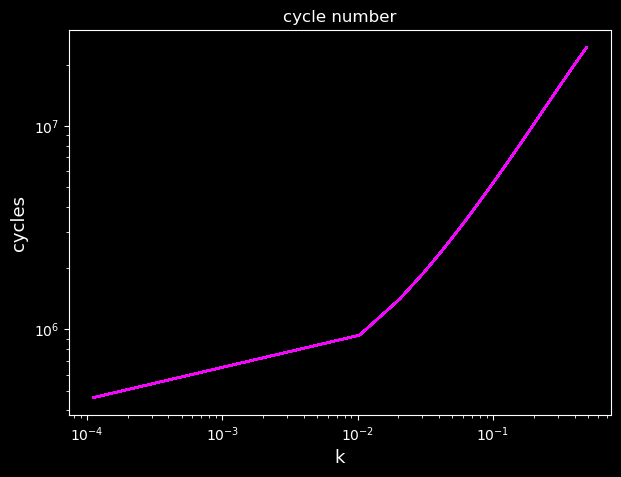

In [58]:
#As k increases how do cycles increase for all p values
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

colors = cm.cool(np.linspace(0, 1, len(cyclist)))
fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(cyc_n_list)):
    plot1 = plt.plot(k_vals[:len(k_vals)-1], cyc_n_list[i], c = colors[i],label = cyclist[i][cyclist[i].find('-p')+1:cyclist[i].find('-c')])
    axarr.set_title(str('cycle number'))
    axarr.set_ylabel('cycles', size = '13')
    axarr.set_xlabel('k', size = '13')
axarr.set_xscale('log')
axarr.set_yscale('log')
#axarr.legend()
plt.show()

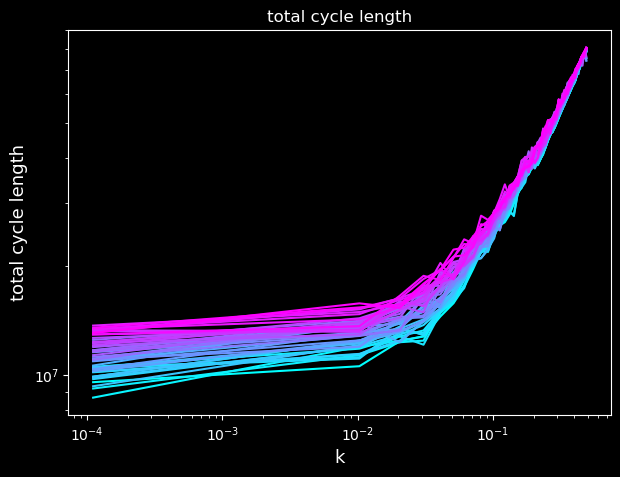

In [60]:
# as k increases how does cycle length increase for each p
colors = cm.cool(np.linspace(0, 1, len(cyclist)))
fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(cyc_nodes_list)):
    plt.plot(k_vals[:len(k_vals)-1], cyc_nodes_list[i], c = colors[i], label = cyclist[i][cyclist[i].find('-p')+1:cyclist[i].find('-c')])
    axarr.set_title(str('total cycle length'))
    axarr.set_ylabel('total cycle length', size = '13')
    axarr.set_xlabel('k', size = '13')
axarr.set_xscale('log')
axarr.set_yscale('log')
#axarr.legend()
plt.show()

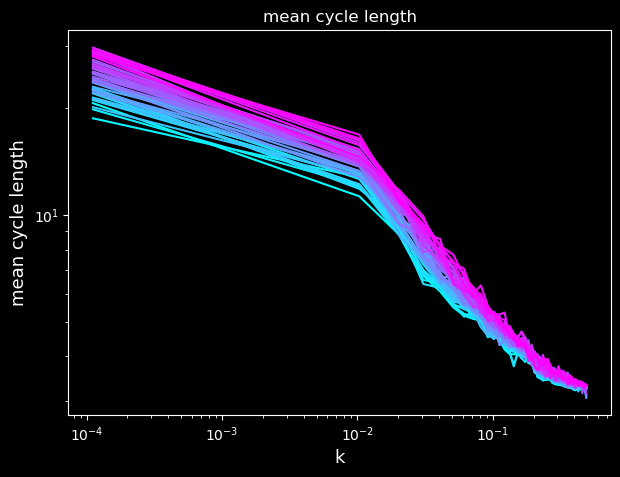

In [61]:
# as k increases how does mean cycle length change for each p

fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(mean_cyc_nodes_list)):
    plt.plot(k_vals[:len(k_vals)-1], mean_cyc_nodes_list[i], c = colors[i], label = cyclist[i][cyclist[i].find('-p')+1:cyclist[i].find('-c')])
    axarr.set_title(str('mean cycle length'))
    axarr.set_ylabel('mean cycle length', size = '13')
    axarr.set_xlabel('k', size = '13')
#axarr.legend()
axarr.set_xscale('log')
axarr.set_yscale('log')
plt.show()

In [62]:
#Calculate cycle parameters 
cyc_n_list = list(range(len(np.load(cyclist[0],allow_pickle=True))))
cyc_nodes_list = list(range(len(np.load(cyclist[0],allow_pickle=True))))
mean_cyc_nodes_list = list(range(len(np.load(cyclist[0],allow_pickle=True))))

for i in range(len(np.load(cyclist[0],allow_pickle=True))):     
    cyc_n = np.zeros(len(cyclist))
    cyc_nodes = np.zeros(len(cyclist))
    mean_cyc_nodes = np.zeros(len(cyclist))
    for e in range(len(cyclist)):
        cyc_n[e] = np.load(cyclist[e], allow_pickle=True)[i][2]
        multi = np.multiply(np.load(cyclist[e], allow_pickle=True)[i][0][0],np.load(cyclist[e], allow_pickle=True)[i][0][1])
        cyc_nodes[e] =  np.sum(multi)
        mean_cyc_nodes[e] = (cyc_nodes[e]/cyc_n[e])
    cyc_n_list[i] = cyc_n
    cyc_nodes_list[i] = cyc_nodes
    mean_cyc_nodes_list[i] = mean_cyc_nodes

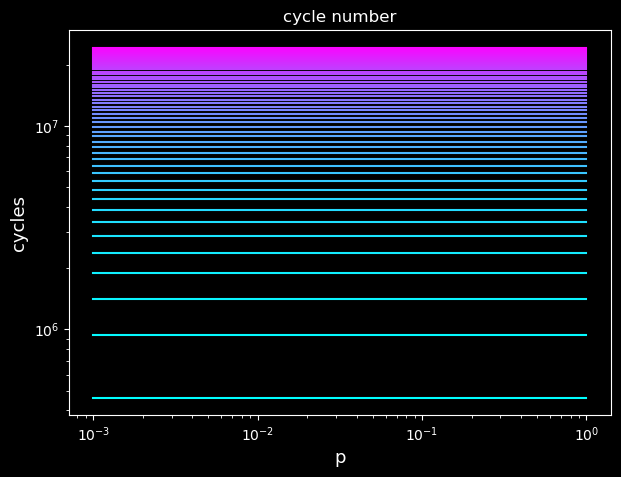

In [64]:
# as p increases how does cycles increase for each k

fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(cyc_n_list)):
    plt.plot(p_vals, cyc_n_list[i], c = colors[i], label = k_vals[i])
    axarr.set_title(str('cycle number'))
    axarr.set_ylabel('cycles', size = '13')
    axarr.set_xlabel('p', size = '13')
axarr.set_xscale('log')
axarr.set_yscale('log')
#axarr.legend()
plt.show()

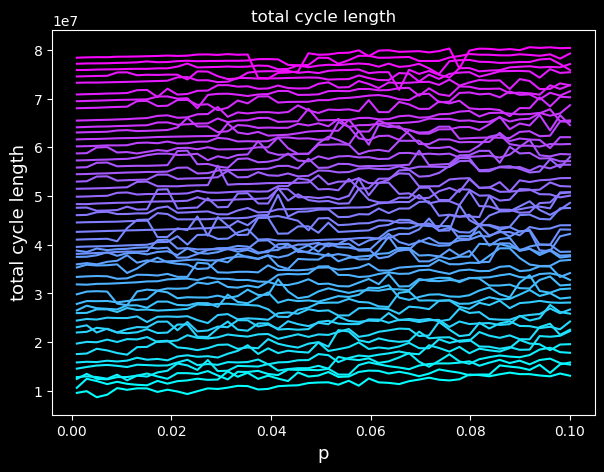

In [80]:
#as p increases how does total cycle length increase for each k

fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(cyc_nodes_list)):
    plt.plot(p_vals, cyc_nodes_list[i], c = colors[i], label = k_vals[i])
    axarr.set_title(str('total cycle length'))
    axarr.set_ylabel('total cycle length', size = '13')
    axarr.set_xlabel('p', size = '13')
#axarr.legend()
plt.show()

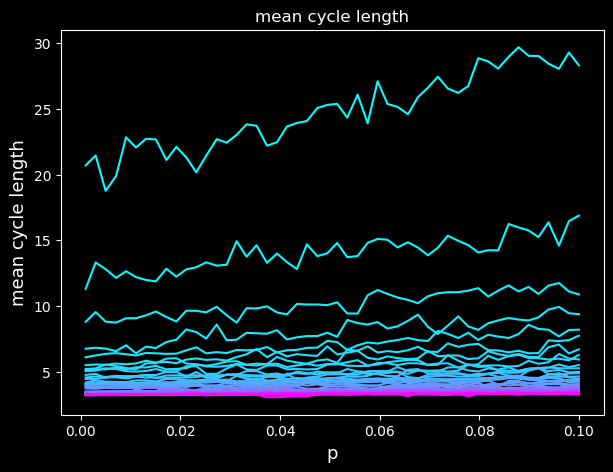

In [81]:
# as p increases how does mean cycle length increase
fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(mean_cyc_nodes_list)):
    plt.plot(p_vals, mean_cyc_nodes_list[i], c = colors[i], label = k_vals[i])
    axarr.set_title(str('mean cycle length'))
    axarr.set_ylabel('mean cycle length', size = '13')
    axarr.set_xlabel('p', size = '13')
#axarr.legend()
plt.show()

In [180]:
#Calculate cycle parameters 
cyc_n_list = list(range(len(cyclist)))
cyc_nodes_list = list(range(len(cyclist)))
mean_cyc_nodes_list = list(range(len(cyclist)))

for i in range(len(cyclist)):
    cyc_n = np.zeros(len(np.load(cyclist[i], allow_pickle=True)))
    cyc_nodes = np.zeros(len(np.load(cyclist[i], allow_pickle=True)))
    mean_cyc_nodes = np.zeros(len(np.load(cyclist[i], allow_pickle=True)))
    for e in range(len(np.load(cyclist[i], allow_pickle=True))):
        cyc_n[e] = np.load(cyclist[i], allow_pickle=True)[e][2]
        multi = np.multiply(np.load(cyclist[i], allow_pickle=True)[e][0][0],np.load(cyclist[i], allow_pickle=True)[e][0][1])
        cyc_nodes[e] =  np.sum(multi)
        mean_cyc_nodes[e] = (cyc_nodes[e]/cyc_n[e])
    cyc_n_list[i] = cyc_n
    cyc_nodes_list[i] = cyc_nodes
    mean_cyc_nodes_list[i] = mean_cyc_nodes

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


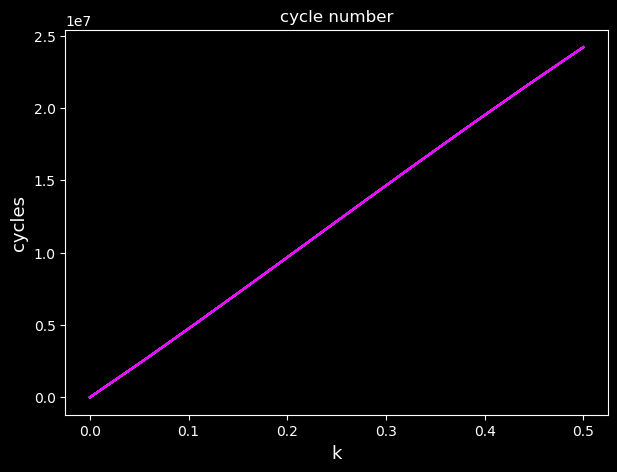

In [187]:
#K + P - LIN SCALE (high p)
#As k increases how do cycles increase for all p values
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

colors = cm.cool(np.linspace(0, 1, len(cyclist)))
fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(cyc_n_list)):
    plot1 = plt.plot(k_vals, cyc_n_list[i], c = colors[i],label = cyclist[i][cyclist[i].find('-p')+1:cyclist[i].find('-c')])
    axarr.set_title(str('cycle number'))
    axarr.set_ylabel('cycles', size = '13')
    axarr.set_xlabel('k', size = '13')

#axarr.legend()
plt.show()

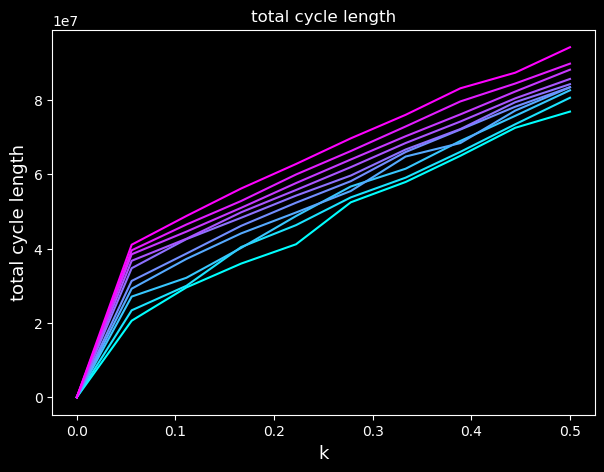

In [190]:
# as k increases how does cycle length increase for each p
colors = cm.cool(np.linspace(0, 1, len(cyclist)))
fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(cyc_nodes_list)):
    plt.plot(k_vals, cyc_nodes_list[i], c = colors[i], label = cyclist[i][cyclist[i].find('-p')+1:cyclist[i].find('-c')])
    axarr.set_title(str('total cycle length'))
    axarr.set_ylabel('total cycle length', size = '13')
    axarr.set_xlabel('k', size = '13')
#axarr.legend()
plt.show()

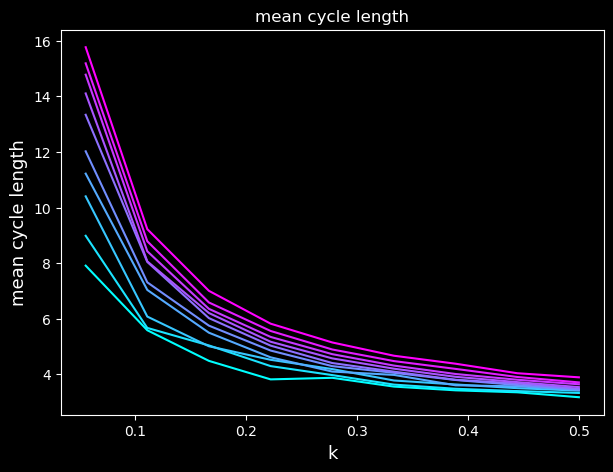

In [191]:
# as k increases how does mean cycle length change for each p

fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(mean_cyc_nodes_list)):
    plt.plot(k_vals, mean_cyc_nodes_list[i], c = colors[i], label = cyclist[i][cyclist[i].find('-p')+1:cyclist[i].find('-c')])
    axarr.set_title(str('mean cycle length'))
    axarr.set_ylabel('mean cycle length', size = '13')
    axarr.set_xlabel('k', size = '13')
#axarr.legend()
plt.show()

In [192]:
#Calculate cycle parameters
cyc_n_list = list(range(len(np.load(cyclist[0],allow_pickle=True))))
cyc_nodes_list = list(range(len(np.load(cyclist[0],allow_pickle=True))))
mean_cyc_nodes_list = list(range(len(np.load(cyclist[0],allow_pickle=True))))

for i in range(len(np.load(cyclist[0],allow_pickle=True))):     
    cyc_n = np.zeros(len(cyclist))
    cyc_nodes = np.zeros(len(cyclist))
    mean_cyc_nodes = np.zeros(len(cyclist))
    for e in range(len(cyclist)):
        cyc_n[e] = np.load(cyclist[e], allow_pickle=True)[i][2]
        multi = np.multiply(np.load(cyclist[e], allow_pickle=True)[i][0][0],np.load(cyclist[e], allow_pickle=True)[i][0][1])
        cyc_nodes[e] =  np.sum(multi)
        mean_cyc_nodes[e] = (cyc_nodes[e]/cyc_n[e])
    cyc_n_list[i] = cyc_n
    cyc_nodes_list[i] = cyc_nodes
    mean_cyc_nodes_list[i] = mean_cyc_nodes

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


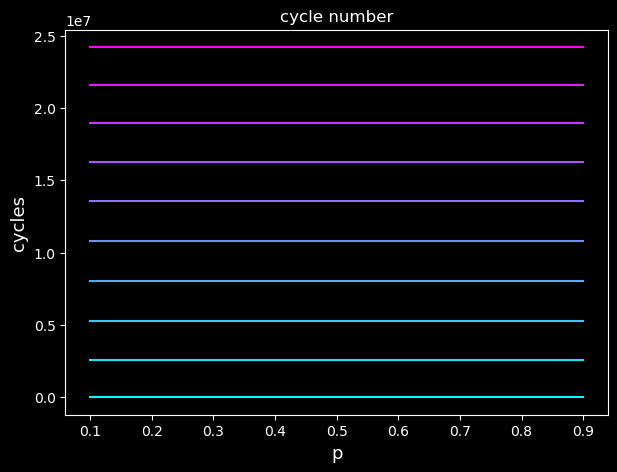

In [193]:
# as p increases how does cycles increase for each k

fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(cyc_n_list)):
    plt.plot(p_vals, cyc_n_list[i], c = colors[i], label = k_vals[i])
    axarr.set_title(str('cycle number'))
    axarr.set_ylabel('cycles', size = '13')
    axarr.set_xlabel('p', size = '13')
#axarr.legend()
plt.show()

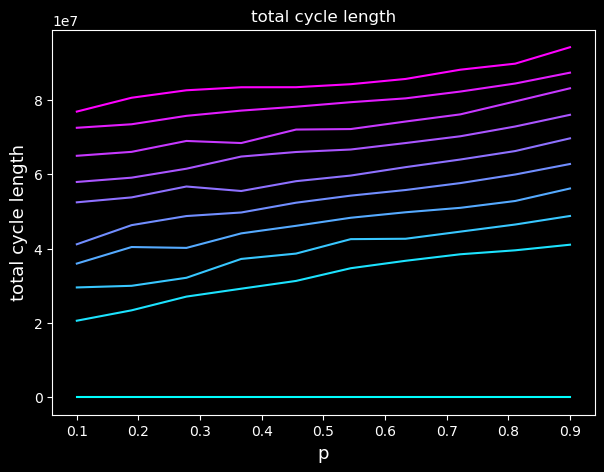

In [194]:
#as p increases how does total cycle length increase for each k

fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(cyc_nodes_list)):
    plt.plot(p_vals, cyc_nodes_list[i], c = colors[i], label = k_vals[i])
    axarr.set_title(str('total cycle length'))
    axarr.set_ylabel('total cycle length', size = '13')
    axarr.set_xlabel('p', size = '13')
#axarr.legend()
plt.show()

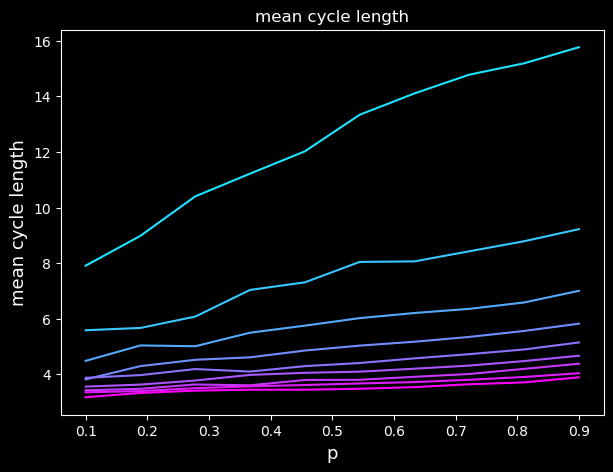

In [195]:
# as p increases how does mean cycle length increase

fig, axarr = plt.subplots(figsize = (7,5))
for i in range(len(mean_cyc_nodes_list)):
    plt.plot(p_vals, mean_cyc_nodes_list[i], c = colors[i], label = k_vals[i])
    axarr.set_title(str('mean cycle length'))
    axarr.set_ylabel('mean cycle length', size = '13')
    axarr.set_xlabel('p', size = '13')
#axarr.legend()
plt.show()